In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import missingno as msno
import pickle
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [22]:
thyroid_data = pd.read_csv('input/Book2.csv', header=None)

In [23]:
thyroid_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,age,sex,sick,pregnant,thyroid surgery,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass
1,41,F,f,f,f,f,f,f,f,f,1.3,2.5,125,1.14,109,P
2,73,M,t,f,f,f,f,f,f,f,8,1.3,101,0.93,108,N
3,46,M,f,f,f,f,f,f,f,f,0.98,0,109,0.91,120,P
4,55,F,t,f,f,f,f,f,f,f,11,1.5,144,1.24,116,N
5,70,F,f,f,f,f,f,f,f,f,0.72,1.2,61,0.87,70,P
6,18,F,f,f,f,f,f,f,f,f,0.03,1.3,183,1.3,141,P
7,80,F,f,f,f,f,f,f,f,f,2.2,0.6,80,0.7,115,P
8,66,F,f,f,f,f,f,t,f,f,0.6,2.2,123,0.93,132,P
9,68,M,f,f,f,f,f,f,f,f,2.4,1.6,83,0.89,93,P


In [24]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       52 non-null     object
 1   1       52 non-null     object
 2   2       52 non-null     object
 3   3       52 non-null     object
 4   4       52 non-null     object
 5   5       52 non-null     object
 6   6       52 non-null     object
 7   7       52 non-null     object
 8   8       52 non-null     object
 9   9       52 non-null     object
 10  10      52 non-null     object
 11  11      52 non-null     object
 12  12      52 non-null     object
 13  13      52 non-null     object
 14  14      52 non-null     object
 15  15      52 non-null     object
dtypes: object(16)
memory usage: 6.6+ KB


In [26]:
#Name of the Variables in order, gathered from the Raw Data
feature_list =['age','sex','sick','pregnant','thyroid surgery','lithium','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','binaryClass']
len(feature_list)

16

In [28]:
thyroid_data.columns = feature_list
thyroid_data.head()

,age,sex,sick,pregnant,thyroid surgery,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass
0,age,sex,sick,pregnant,thyroid surgery,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass
1,41,F,f,f,f,f,f,f,f,f,1.3,2.5,125,1.14,109,P
2,73,M,t,f,f,f,f,f,f,f,8,1.3,101,0.93,108,N
3,46,M,f,f,f,f,f,f,f,f,0.98,0,109,0.91,120,P
4,55,F,t,f,f,f,f,f,f,f,11,1.5,144,1.24,116,N


In [29]:
thyroid_data=thyroid_data.drop(thyroid_data.index[0])
thyroid_data.head()

,age,sex,sick,pregnant,thyroid surgery,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass
1,41,F,f,f,f,f,f,f,f,f,1.3,2.5,125,1.14,109,P
2,73,M,t,f,f,f,f,f,f,f,8,1.3,101,0.93,108,N
3,46,M,f,f,f,f,f,f,f,f,0.98,0,109,0.91,120,P
4,55,F,t,f,f,f,f,f,f,f,11,1.5,144,1.24,116,N
5,70,F,f,f,f,f,f,f,f,f,0.72,1.2,61,0.87,70,P


In [30]:
thyroid_data.isna().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
lithium            0
goitre             0
tumor              0
hypopituitary      0
psych              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
binaryClass        0
dtype: int64

In [31]:
num_vars = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
thyroid_data[num_vars] = thyroid_data[num_vars].apply(lambda x: x.astype('float64'))


In [34]:
cat_vars = ['sex', 'sick', 'pregnant', 'thyroid surgery', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych']

In [35]:
thyroid_data[cat_vars] = thyroid_data[cat_vars].apply(lambda x: np.where(x=='t', True, np.where(x=='f', False, x)))
thyroid_data[cat_vars].head()

,sex,sick,pregnant,thyroid surgery,lithium,goitre,tumor,hypopituitary,psych
1,F,False,False,False,False,False,False,False,False
2,M,True,False,False,False,False,False,False,False
3,M,False,False,False,False,False,False,False,False
4,F,True,False,False,False,False,False,False,False
5,F,False,False,False,False,False,False,False,False


In [36]:
thyroid_data['condition'] = thyroid_data['binaryClass']

In [38]:
thyroid_data.drop(columns=['binaryClass'], inplace=True)

In [40]:
thyroid_data.condition.value_counts()

P    29
N    22
Name: condition, dtype: int64

In [41]:
thyroid_data['thyroid_disease'] = np.where((thyroid_data.condition == 'P'), True, False)

In [42]:
thyroid_data.thyroid_disease.value_counts()

True     29
False    22
Name: thyroid_disease, dtype: int64

In [43]:
thyroid_data.duplicated().sum()

0

In [44]:
thyroid_data.drop_duplicates(ignore_index=True, inplace=True)

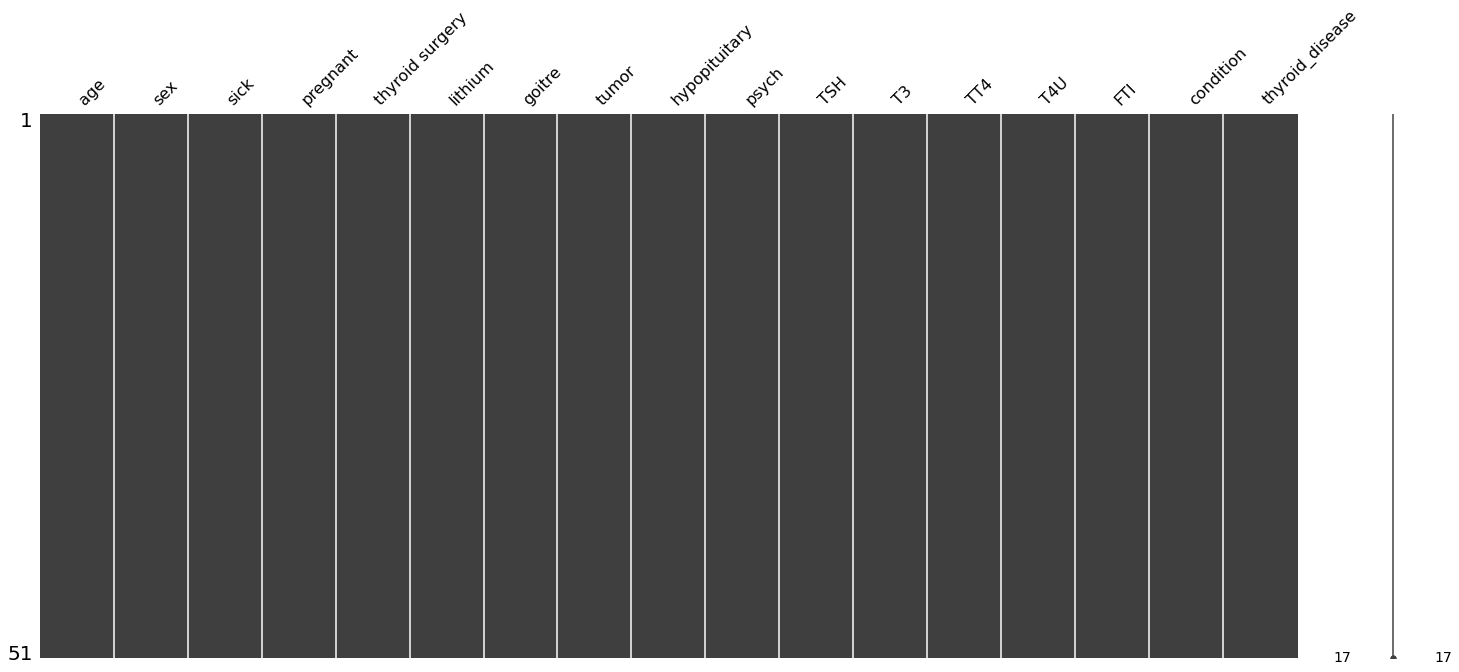

In [45]:
msno.matrix(thyroid_data)
plt.savefig('plots/missing_value_matrix.png', bbox_inches='tight')
plt.show()

In [46]:
thyroid_data.isna().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
lithium            0
goitre             0
tumor              0
hypopituitary      0
psych              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
condition          0
thyroid_disease    0
dtype: int64

In [48]:
X = thyroid_data[thyroid_data.columns.difference(['condition', 'thyroid_disease'])]
y = thyroid_data['thyroid_disease']
print('Thyroid Data : {}\nFeatures :{}\nTarget : {}'.format(thyroid_data.shape, X.shape, y.shape))

Thyroid Data : (51, 17)
Features :(51, 15)
Target : (51,)


In [49]:
cat_vars = [var for var in X.columns if var not in num_vars]
binary_vars = [var for var in cat_vars if var != 'sex']
print('Numerical Variables : {} \nLength : {}'.format(num_vars, len(num_vars)))
print('Categorical Variables : {} \nLength : {}'.format(cat_vars, len(cat_vars)))
print('Binary Variables : {} \nLength : {}'.format(binary_vars, len(binary_vars)))

Numerical Variables : ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'] 
Length : 6
Categorical Variables : ['goitre', 'hypopituitary', 'lithium', 'pregnant', 'psych', 'sex', 'sick', 'thyroid surgery', 'tumor'] 
Length : 9
Binary Variables : ['goitre', 'hypopituitary', 'lithium', 'pregnant', 'psych', 'sick', 'thyroid surgery', 'tumor'] 
Length : 8


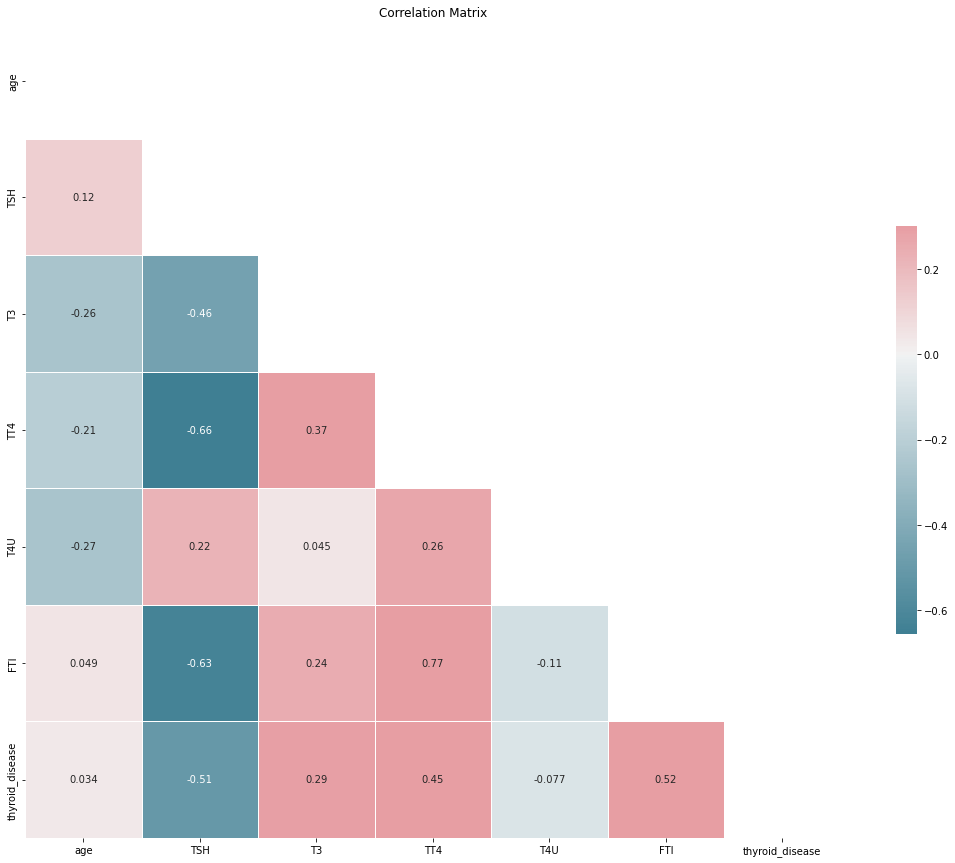

In [50]:
corr_matrix = thyroid_data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix')

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [51]:
thyroid_data[num_vars].iloc[:,1]

0       1.30
1       8.00
2       0.98
3      11.00
4       0.72
5       0.03
6       2.20
7       0.60
8       2.40
9       1.10
10     12.00
11      1.20
12      1.50
13      6.00
14      2.10
15      0.10
16     45.00
17     14.80
18     15.00
19     19.00
20      7.80
21      1.30
22    160.00
23     12.00
24      8.80
25    151.00
26      0.99
27      0.04
28      3.90
29      0.02
30      9.40
31     11.40
32      1.40
33      1.10
34      1.10
35    143.00
36     16.00
37    108.00
38      9.00
39      9.00
40      0.10
41      9.20
42      3.90
43     86.00
44      0.62
45      2.00
46      9.10
47      5.90
48      3.30
49      0.25
50     52.00
Name: TSH, dtype: float64

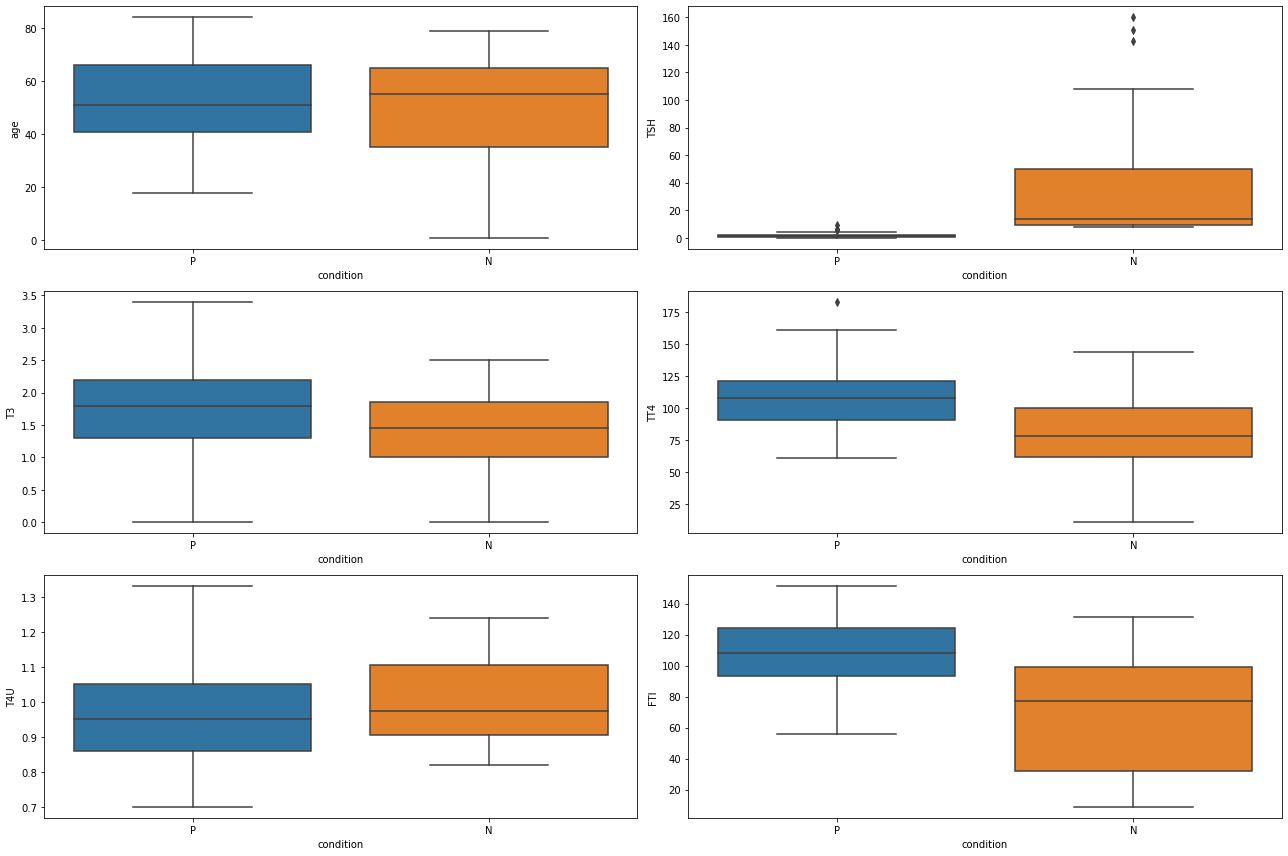

In [52]:
ig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.boxplot(data=thyroid_data, x='condition', y=thyroid_data[num_vars].iloc[:,i], ax=ax[i])
plt.tight_layout()
plt.show()

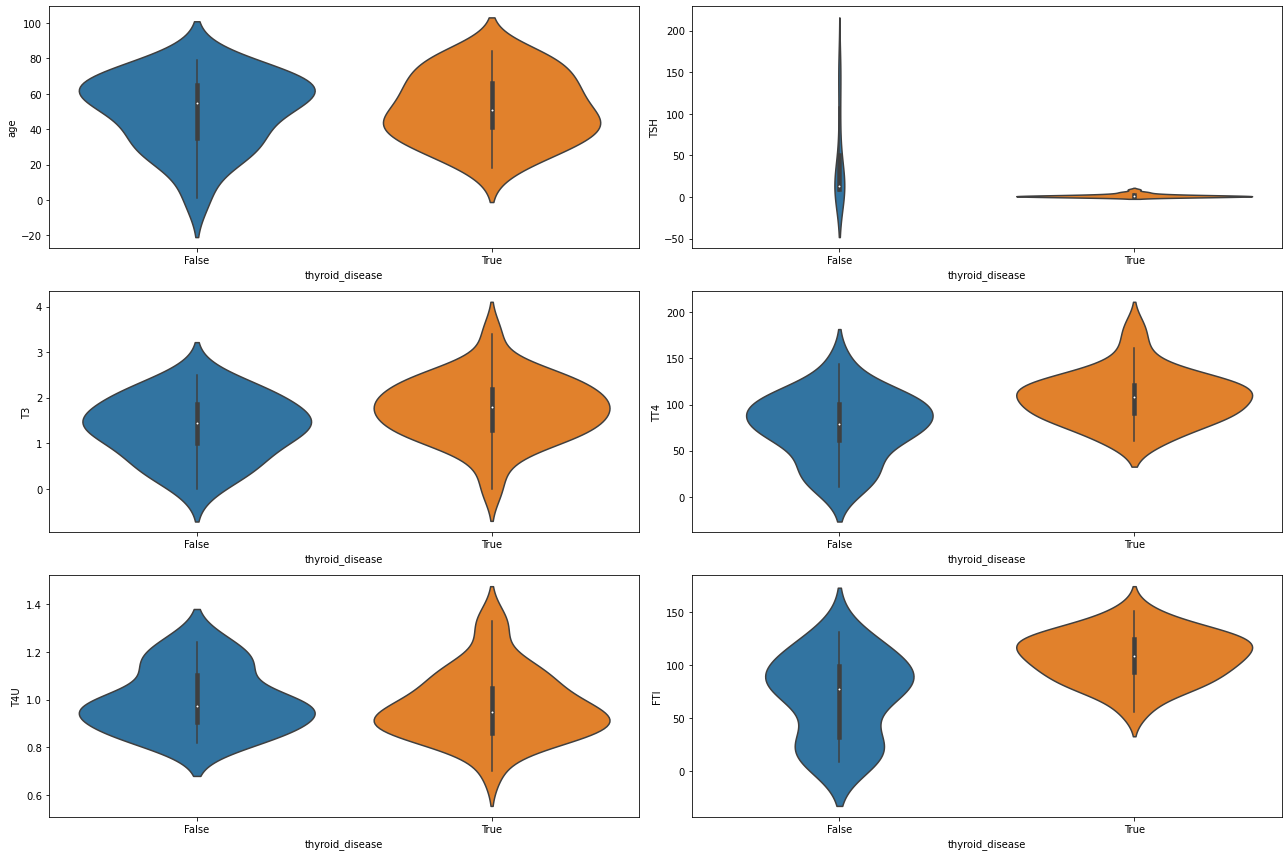

In [53]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.violinplot(data=thyroid_data, x='thyroid_disease', y=thyroid_data[num_vars].iloc[:,i], ax=ax[i])
plt.tight_layout()
plt.show()

In [54]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=12345)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(35, 15)
(16, 15)
(35,)
(16,)


In [55]:
outliers_ucap = {}
outliers_lcap = {}
for num_var in num_vars:
    if num_var == 'age':
        outliers_lcap[num_var] = round(train_x[num_var].dropna().quantile(0.001),2)
        outliers_ucap[num_var] = round(train_x[num_var].dropna().quantile(0.999),2)
    else:
        outliers_lcap[num_var] = round(train_x[num_var].dropna().quantile(0.01),2)
        outliers_ucap[num_var] = round(train_x[num_var].dropna().quantile(0.99),2)
print('Lower Cap :',outliers_lcap)
print('Upper Cap :',outliers_ucap)

Lower Cap : {'age': 1.58, 'TSH': 0.02, 'T3': 0.14, 'TT4': 20.12, 'T4U': 0.74, 'FTI': 13.34}
Upper Cap : {'age': 83.86, 'TSH': 136.38, 'T3': 3.13, 'TT4': 169.74, 'T4U': 1.28, 'FTI': 147.6}


In [58]:
# For outliers_lcap
# create a binary pickle file 
f1 = open("C:/Users/User/Documents/MINI-PROJECT-THYROID/Thyroid-Disease-Detection-main/object-instances/outliers_lcap.pkl","wb")

# write the python object (dict) to pickle file
pickle.dump(outliers_lcap,f1)

# close file
f1.close()

# For outliers_ucap
f2 = open("C:/Users/User/Documents/MINI-PROJECT-THYROID/Thyroid-Disease-Detection-main/object instances/outliers_ucap.pkl","wb")
pickle.dump(outliers_ucap,f2)
f2.close()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/User/Documents/MINI-PROJECT-THYROID/Thyroid-Disease-Detection-main/object instances/outliers_ucap.pkl'

In [59]:
# For Training Data
for num_var in num_vars:
    if num_var == 'age':
        train_x[num_var] = train_x[num_var].clip(lower=train_x[num_var].dropna().quantile(0.001), upper=train_x[num_var].dropna().quantile(0.999))
    else:
        train_x[num_var] = train_x[num_var].clip(lower=train_x[num_var].dropna().quantile(0.01), upper=train_x[num_var].dropna().quantile(0.99))

In [60]:
# For Testing Data
for num_var in num_vars:
    test_x[num_var] = test_x[num_var].clip(lower= outliers_lcap[num_var], upper=outliers_ucap[num_var])

In [61]:
train_x.isna().sum()

FTI                0
T3                 0
T4U                0
TSH                0
TT4                0
age                0
goitre             0
hypopituitary      0
lithium            0
pregnant           0
psych              0
sex                0
sick               0
thyroid surgery    0
tumor              0
dtype: int64

In [62]:
num_vars

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [63]:
missing_imputation = {}
for num_var in train_x.columns:
    if num_var in ['age', 'T3', 'TT4', 'T4U', 'FTI']:
        missing_imputation[num_var] = round(train_x[num_var].dropna().mean(),2)
    elif num_var == 'TSH':
        missing_imputation[num_var] = round(train_x[num_var].dropna().median(),2)
    elif num_var == 'sex':
        missing_imputation[num_var] = train_x[num_var].dropna().mode()[0]
    else:
        continue
print(missing_imputation)

{'FTI': 95.17, 'T3': 1.66, 'T4U': 0.97, 'TSH': 6.0, 'TT4': 95.4, 'age': 52.3, 'sex': 'F'}


In [66]:
f = open("Documents/MINI-PROJECT-THYROID/Thyroid-Disease-Detection-main/object-instances/missing_imputation.pkl","wb")
pickle.dump(missing_imputation,f)
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'Documents/MINI-PROJECT-THYROID/Thyroid-Disease-Detection-main/object-instances/missing_imputation.pkl'

In [67]:
# For 'Sex' Variable : 'M' - 1 and 'F' - 0
train_x.sex = train_x.sex.map({'M':1, 'F':0})
test_x.sex = test_x.sex.map({'M':1, 'F':0})

In [68]:
# For all the other Variables : 'True' - 1 and 'False' - 0
train_x[cat_vars] = train_x[cat_vars].apply(lambda x: np.where(x==True, 1, 0))
test_x[cat_vars] = test_x[cat_vars].apply(lambda x: np.where(x==True, 1, 0))
train_x.head()

,FTI,T3,T4U,TSH,TT4,age,goitre,hypopituitary,lithium,pregnant,psych,sex,sick,thyroid surgery,tumor
42,100.0,1.7,1.0400,3.90,104.00,76.0,0,0,0,0,0,0,0,0,0
20,96.0,2.0,0.9900,7.80,95.00,34.0,0,0,0,0,0,1,1,0,1
5,141.0,1.3,1.2796,0.03,169.74,18.0,0,0,0,0,0,0,0,0,0
3,116.0,1.5,1.2400,11.00,144.00,55.0,0,0,0,0,0,0,1,0,0
15,147.6,2.6,0.8600,0.10,130.00,51.0,0,0,0,0,0,0,0,0,0


In [78]:
scaler = StandardScaler()

In [79]:
scaler = ColumnTransformer([('scaler', StandardScaler(), ['FTI', 'T3', 'T4U', 'TSH', 'TT4', 'age'])], remainder='passthrough')

In [80]:
train_x_scaled = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns)
train_x_scaled.head()

,FTI,T3,T4U,TSH,TT4,age,goitre,hypopituitary,lithium,pregnant,psych,sex,sick,thyroid surgery,tumor
0,0.138787,0.055187,0.511603,-0.374941,0.263548,1.178636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.023856,0.524008,0.120572,-0.239847,-0.012130,-0.909940,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,1.316827,-0.569908,2.385423,-0.508995,2.277218,-1.705588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.598510,-0.257361,2.075727,-0.129001,1.488781,0.134348,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.506463,1.461651,-0.896109,-0.506570,1.059949,-0.064564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
# Dumping the scaler into a pickle file
file = open('models/scaler1.pkl', 'wb' )

pickle.dump(scaler, file)

file.close()

In [98]:
test_x_scaled = pd.DataFrame(scaler.transform(test_x), columns=train_x.columns)
test_x_scaled.head()

,FTI,T3,T4U,TSH,TT4,age,goitre,hypopituitary,lithium,pregnant,psych,sex,sick,thyroid surgery,tumor
0,-0.062342,-0.101087,-0.661490,-0.426900,-0.379700,0.780812,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.196252,-1.038730,-0.035841,-0.115145,0.110393,0.333260,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.052589,-0.569908,-0.974315,-0.374941,-0.379700,-0.860212,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.665728,-1.507551,0.276984,4.214092,-0.686008,1.327820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.351187,-1.976373,2.075727,4.214092,-2.305766,-0.661300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
oversampler = RandomOverSampler(random_state=12345)
train_x_os, train_y_os = oversampler.fit_resample(train_x, train_y)
train_y_os.value_counts()

True     19
False    19
Name: thyroid_disease, dtype: int64

In [100]:
log_reg = LogisticRegression(random_state=12345)

log_reg.fit(train_x_os, train_y_os)

LogisticRegression(random_state=12345)

In [101]:
# Dumping the log_reg model into a pickle file
file = open('models/LogisticRegression.pkl', 'wb' )

pickle.dump(log_reg, file)

file.close()

In [102]:
# Creating a Dataframe to save all the Predictions
train_predictions_df = pd.DataFrame({'log_reg_pred': log_reg.predict(train_x_os), 'log_reg_proba': log_reg.predict_proba(train_x_os)[:,1]})
test_predictions_df = pd.DataFrame({'log_reg_pred': log_reg.predict(test_x_scaled), 'log_reg_proba': log_reg.predict_proba(test_x_scaled)[:,1]})

In [103]:
logreg_train_acc = accuracy_score(train_y_os, train_predictions_df.log_reg_pred)
logreg_test_acc = accuracy_score(test_y, test_predictions_df.log_reg_pred)
logreg_train_auc = roc_auc_score(train_y_os, train_predictions_df.log_reg_proba)
logreg_test_auc = roc_auc_score(test_y, test_predictions_df.log_reg_proba)
print('Training Accuracy :{} | Testing Accuracy :{}'.format(logreg_train_acc, logreg_test_acc))
print('Training AUC :{} | Testing AUC :{}'.format(logreg_train_auc, logreg_test_auc ))

Training Accuracy :1.0 | Testing Accuracy :0.625
Training AUC :1.0 | Testing AUC :0.9833333333333334


In [104]:
rf_clf = RandomForestClassifier(random_state=12345)

rf_clf.fit(train_x_os, train_y_os)

RandomForestClassifier(random_state=12345)

In [106]:
file  = open('models/RandomForest2.pkl', 'wb' )

pickle.dump(rf_clf, file)

file.close()

In [96]:
train_predictions_df = pd.concat([train_predictions_df, pd.Series(rf_clf.predict(train_x_os), name='rf_clf_pred'), pd.Series(rf_clf.predict_proba(train_x_os)[:,1], name='rf_clf_proba')], axis=1)
test_predictions_df = pd.concat([test_predictions_df, pd.Series(rf_clf.predict(test_x_scaled), name='rf_clf_pred'), pd.Series(rf_clf.predict_proba(test_x_scaled)[:,1],name='rf_clf_proba')], axis=1)

In [97]:
rf_clf_train_acc = accuracy_score(train_y_os, train_predictions_df.rf_clf_pred)
rf_clf_test_acc = accuracy_score(test_y, test_predictions_df.rf_clf_pred)
rf_clf_train_auc = roc_auc_score(train_y_os, train_predictions_df.rf_clf_proba)
rf_clf_test_auc = roc_auc_score(test_y, test_predictions_df.rf_clf_proba)
print('Training Accuracy :{} | Testing Accuracy :{}'.format(rf_clf_train_acc, rf_clf_test_acc))
print('Training AUC :{} | Testing AUC :{}'.format(rf_clf_train_auc, rf_clf_test_auc ))

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [75]:
train_predictions_df = pd.concat([train_predictions_df, pd.Series(rf_clf.predict(train_x_os), name='rf_clf_pred'), pd.Series(rf_clf.predict_proba(train_x_os)[:,1], name='rf_clf_proba')], axis=1)
test_predictions_df = pd.concat([test_predictions_df, pd.Series(rf_clf.predict(test_x_scaled), name='rf_clf_pred'), pd.Series(rf_clf.predict_proba(test_x_scaled)[:,1],name='rf_clf_proba')], axis=1)

NameError: name 'train_predictions_df' is not defined